In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
import networkx as nx

In [2]:
## Load necessary data
G = pickle.load(open('data/cleaned_network.p', 'rb'))
df_h = pickle.load(open("data/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/ivs_exploded_100.p", "rb"))
paths = pickle.load(open("data/paths_ship_specific_routes.p", "rb"))
path_lengths = pickle.load(open("data/path_lengths_ship_specific_routes.p", "rb"))

In [3]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

 

harbour_nodes = df_h.harbour_node.unique()

#extract data

df_links = nx.to_pandas_edgelist(G)

df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
 

# add degree to dataframes

df_links['degree_source'] = df_links.source.apply(lambda x: G.degree[x])

df_links['degree_target'] = df_links.source.apply(lambda x: G.degree[x])

df_nodes['degree'] = G.degree

df_nodes['degree'] = df_nodes.degree.apply(lambda x: x[1])

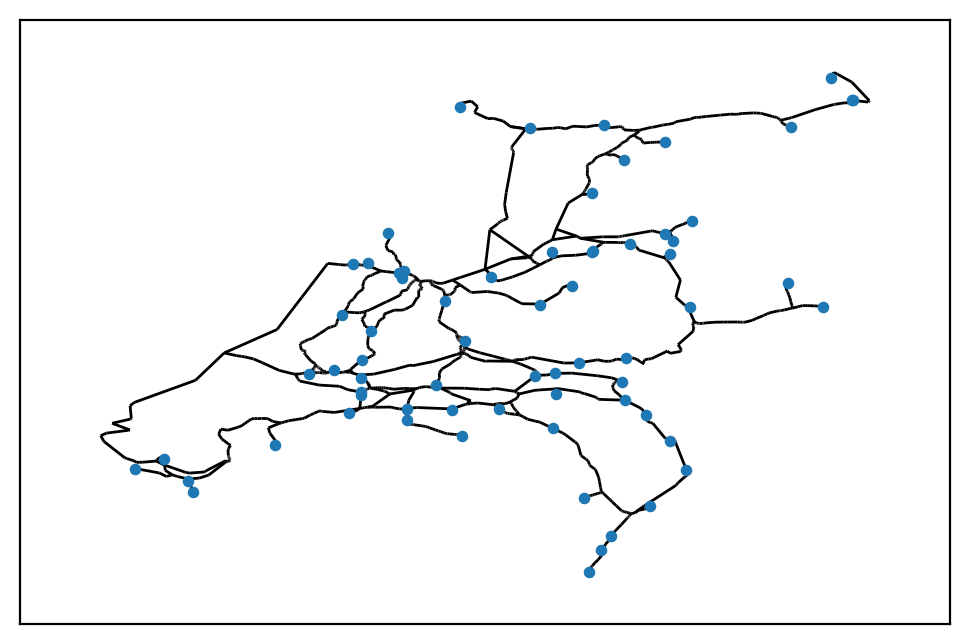

In [4]:
plt.subplots(dpi=200)
nx.draw_networkx_edges(G, pos_dict)
nx.draw_networkx_nodes(G, pos_dict, harbour_nodes, node_size=10)

In [5]:
nodes_to_keep = df_nodes.loc[(df_nodes.degree!=2)&(~df_nodes.n.isin(harbour_nodes))]

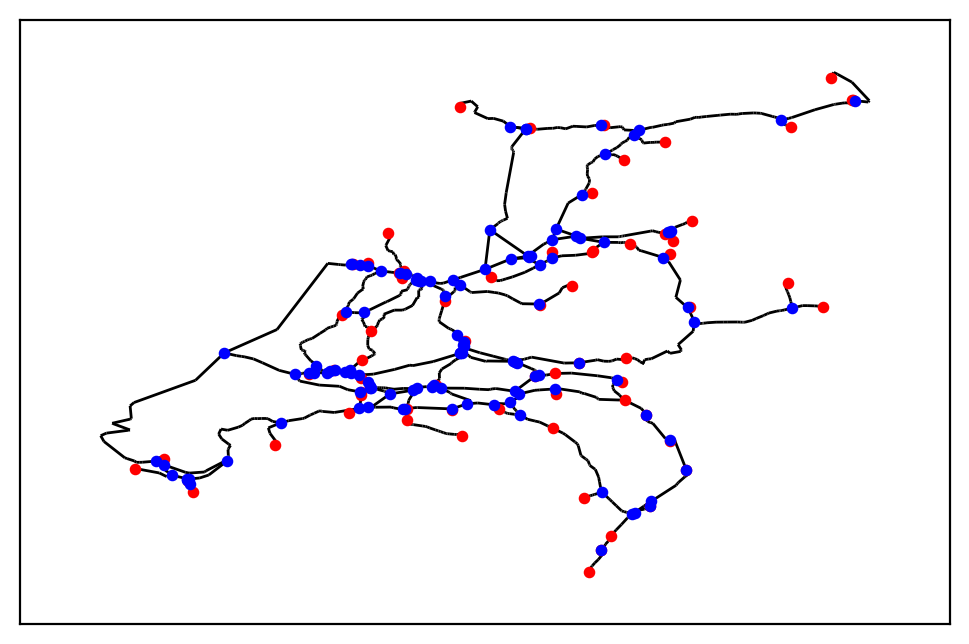

In [6]:
plt.subplots(dpi=200)
nx.draw_networkx_edges(G, pos_dict)
nx.draw_networkx_nodes(G, pos_dict, harbour_nodes, node_size=10, node_color='r')
nx.draw_networkx_nodes(G, pos_dict, list(nodes_to_keep.n), node_size=10, node_color='b')
plt.show()

In [7]:
a = [1, 2, ]

In [9]:
for route, path in paths.items():
    #define new path that skips earlier removed nodes
    print(len(path))
    temp_path = []
    for i in path:
        if i in G.nodes:
            temp_path.append(i)
    path = temp_path
    
    print(len(path))
    print(path)
    
    
    new_path = []
    for node in path:
        if (node in harbour_nodes) | (node in nodes_to_keep):
            new_path.append(node)

    #need to keep track of this to establish new link
    departed_from = path[0]
    current_dist_travelled = 0
    
    #store previous pos, current pos will be in loop
    previous_pos = path[0]
    
    #remember which nodes and links to remove
    links_to_remove = []
    nodes_to_remove = []
    
    #go over all subdests except origin and final destination
    for current_pos in path[1:-1]:
        #travel
        current_dist_travelled += nx.dijkstra_path_length(G, previous_pos, current_pos, weight='length_m')
        
        #add link to remove
        links_to_remove.append((previous_pos, current_pos))
        
        # when we pas through any harbour or point with degree >2
        if current_pos in new_path:
            print(departed_from, current_pos, current_dist_travelled)
            G.add_edges_from([(departed_from, current_pos)], length_m=current_dist_travelled)
            
            #reset values
            departed_from = current_pos
            current_dist_travelled = 0
            previous_pos = current_pos
        else:
            #also add node to list to remove
            nodes_to_remove.append(current_pos)
            previous_pos = current_pos
                       
    #remove edges
    G.remove_edges_from(links_to_remove)
    G.remove_nodes_from(nodes_to_remove)

            

152
152
['8863306', '8864009', '8866439', '8861193', 'B4308_B', 'B4308_A', '8861191', '8867588', '8863742', '8867374', 'B4913_B', 'B4913_A', 'L24895_B', 'L24895_A', '8864798', '8867538', '8867549', '8860860', '8868116', '8865170', '8866907', 'B23943_B', 'B23943_A', 'L7804_B', 'L7804_A', 'B57545_B', 'B57545_A', '8865214', 'B32055_B', 'B32055_A', 'B18202_B', 'B18202_A', 'B51737_B', 'B51737_A', 'B17709784_B', 'B17709784_A', 'B19102_B', 'B19102_A', 'B46036_B', 'B46036_A', '30985789', '8866363', 'B46356_B', 'B46356_A', 'B26151_B', 'S58510_A', 'B26151_A', '8863360', 'B26963_A', 'B26963_B', 'B3446_A', 'B3446_B', 'B41042_A', 'B41042_B', 'B33731_A', 'B33731_B', '8862496', 'B27700_B', 'B27700_A', 'S46906_B', 'S46906_A', 'B50163_B', 'B50163_A', '8860982', '8867583', '8865263', '8865954', 'S20232_B', 'S20232_A', '8861413', '8862716', 'S45168_B', 'S45168_A', 'B25728_B', 'B25728_A', 'S47428_B', 'S47428_A', 'B50505_B', 'B50505_A', 'B10908_B', 'B10908_A', 'B56925_B', 'B56925_A', 'B7755_B', 'B7755_A', 

NetworkXNoPath: Node 8866686 not reachable from 8863306

In [ ]:
harbour_nodes

In [ ]:
plt.subplots(dpi=200)
nx.draw_networkx_edges(G, pos_dict)
nx.draw_networkx_nodes(G, pos_dict, harbour_nodes, node_size=10, node_color='r')
nx.draw_networkx_nodes(G, pos_dict, list(nodes_to_keep.n), node_size=10, node_color='b')
plt.show()

In [ ]:
df_nodes.loc['8866686']